In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout,Flatten

In [2]:
da=pd.read_csv('input.csv',parse_dates=True)
df = pd.read_csv('input.csv',index_col="date",parse_dates=True)
df.fillna(method='ffill',inplace=True)
df.head(2)

/var/folders/5c/ypymcvrn237fsg_gl8qrbrzm0000gn/T/ipykernel_42066/658596906.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


,Unnamed: 0,close,high,low,open,NVT
date,,,,,,
2017-03-01,0,17.758,17.758,16.970,16.970,7.576159
2017-03-02,1,19.208,19.246,19.144,19.144,5.164297


In [3]:
pip install tensorflow

You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_close= df['close'].values
df_close = df_close.reshape(-1, 1) #output:(is a 1 dimensional columnar array)
print(df_close.shape)
df_close[:5]

(2191, 1)


array([[17.758],
       [19.208],
       [19.61 ],
       [18.702],
       [19.2  ]])

In [17]:
train = df['2017-03-01':'2022-02-28']
#train= train.drop('Date', 1)


#print('Test Dataset:',test.shape)
#print (train.head())
test  =df['2022-03-01':'2023-02-28']
#print (test.head())

In [18]:
train_close= train['close'].values
train_close = train_close.reshape(-1, 1)

print(train_close.shape)

train_close[:]

(1826, 1)


array([[  17.758     ],
       [  19.208     ],
       [  19.61      ],
       ...,
       [2777.0702202 ],
       [2623.72135576],
       [2917.6247924 ]])

In [19]:
test_close= test['close'].values
test_close = test_close.reshape(-1, 1)

print(test_close.shape)

test_close[:]

(365, 1)


array([[2972.56009642],
       [2951.26980377],
       [2835.72769182],
       [2616.9487868 ],
       [2665.40521136],
       [2556.79388204],
       [2495.5903084 ],
       [2576.25252437],
       [2728.94156881],
       [2609.13856878],
       [2560.70674554],
       [2576.87194175],
       [2518.30429177],
       [2588.36360849],
       [2618.79069541],
       [2771.65018673],
       [2814.77665667],
       [2946.24222635],
       [2946.2084427 ],
       [2859.93519297],
       [2898.27551626],
       [2972.71907066],
       [3030.47612498],
       [3108.01997492],
       [3108.08722237],
       [3143.31100896],
       [3290.32829415],
       [3332.1152552 ],
       [3402.9011743 ],
       [3388.60378697],
       [3283.63174267],
       [3446.01124491],
       [3445.31192239],
       [3520.80606344],
       [3520.51664466],
       [3415.63070083],
       [3172.99992966],
       [3235.23821317],
       [3191.14522444],
       [3261.31753895],
       [3217.9025215 ],
       [2981.078

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
train_close = scaler.fit_transform(train_close)
train_close[1:]
print(train_close.shape)

(1826, 1)


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
test_close = scaler.fit_transform(test_close)
test_close[:5]
print(test_close.shape)

(365, 1)


In [22]:
# converting my 1d array into 2 day array with 60 values in each nested list train_open had 1d array.
#now after implementing the function timestamp it is converting into 2 d array . 
#A list within a list containing 60 values

In [23]:
def timestamp(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y
#count_row = df.shape[0]  # gives number of row count
#count_col = df.shape[1]  # gives number of col count

In [24]:
x_train, y_train = timestamp(train_close)
x_train.shape
#x_train[1:]
y_train[1:]



array([0.00664039, 0.0066787 , 0.00670702, ..., 0.57481101, 0.54287951,
       0.60407839])

In [25]:
x_test, y_test = timestamp(test_close)
x_test[:1]

array([[0.78304142, 0.77461616, 0.72889243, 0.64231457, 0.66149034,
        0.61850934, 0.59428912, 0.62620975, 0.68663372, 0.63922382,
        0.62005779, 0.62645487, 0.60327777, 0.6310025 , 0.64304348,
        0.7035349 , 0.72060143, 0.77262659, 0.77261322, 0.73847212,
        0.75364462, 0.78310433, 0.80596066, 0.83664725, 0.83667387,
        0.85061305, 0.90879253, 0.92532897, 0.95334124, 0.9476833 ,
        0.90614248, 0.97040128, 0.97012454, 1.        , 0.99988547,
        0.95837872, 0.86236191, 0.88699161, 0.86954259, 0.89731204,
        0.88013132, 0.78641251, 0.80682864, 0.84012902, 0.80149774,
        0.80986352, 0.81856566, 0.79163616, 0.81702944, 0.83525832]])

In [26]:
# Reshape features for LSTM Layer (3d array for lstm)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(x_test.shape)

(1776, 50, 1)
(315, 50, 1)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [27]:
l_model = Sequential()


l_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50, return_sequences=True))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50, return_sequences=True))
l_model.add(Dropout(0.2))

l_model.add(LSTM(units=50))
l_model.add(Dropout(0.2))


l_model.add(Dense(units=1))

l_model.compile(loss='mean_squared_error', optimizer='adam')
history=l_model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0039 - val_loss: 0.0109
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.1148e-04 - val_loss: 0.0112
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.8978e-04 - val_loss: 0.0201
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.7287e-04 - val_loss: 0.0070
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.1065e-04 - val_loss: 0.0211
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.9511e-04 - val_loss: 0.0144
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.8054e-04 - val_loss: 0.0222
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.6784e-04 - val_loss: 0.0092
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.4264e-04 - val_loss: 0.0055
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.5407e-04 - val_loss: 0.0071


In [28]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [29]:
#running the algo on the x_test and converting the value into the actual price removing the minmax scale
testPredict = l_model.predict(x_test, batch_size=32)
testPredict=scaler.inverse_transform(testPredict)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


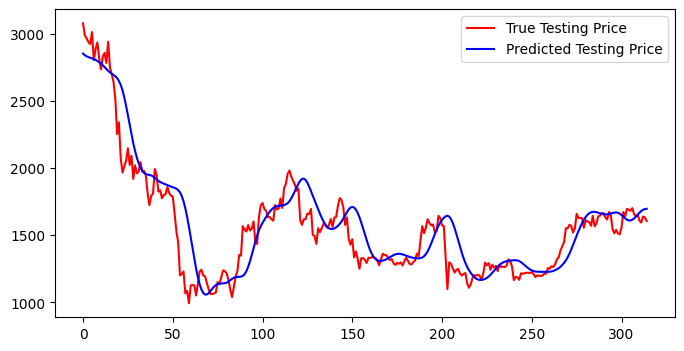

In [30]:
#y_test was previous scaled using minmax so get the actual value it is inversed 
#test_predict is the x_test set which is used after training the train set as the predicting model
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(testPredict, color='blue', label='Predicted Testing Price')
plt.legend()

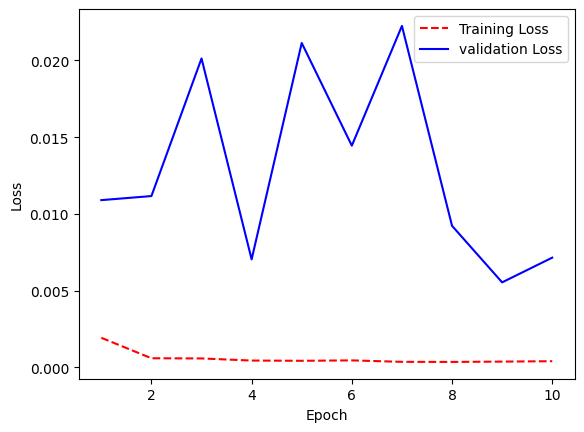

In [31]:
 #Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();


# Error Evaluation Metrics :

In [33]:
import math 
score = l_model.evaluate(x_test, y_test, batch_size=32)

MSE = score
RMSE = math.sqrt(score)
print ("value of Mean square error:", MSE)
print("value of Root mean square error:",RMSE)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070
value of Mean square error: 0.00473861675709486
value of Root mean square error: 0.06883761150050792


In [34]:
from sklearn import metrics
print('R2: ', metrics.r2_score(y_test_scaled, testPredict))

R2:  0.8244358881630875


In [35]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test_scaled, testPredict)

0.8347996921065783